# Eigenvector 구하기 (고유 분해)
고유값과 고유벡터를 찾는 작업을 eigen decomposition이라고도 한다.

In [288]:
import numpy as np

In [39]:
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(A)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


> `numpy.linalg` 라이브러리의 `eig` 사용

numpy에서 고유벡터는 행이 아닌, **열을 고유벡터로 가진다.**

In [40]:
np.linalg.eig(A)

(array([ 1.61168440e+01, -1.11684397e+00, -1.30367773e-15]),
 array([[-0.23197069, -0.78583024,  0.40824829],
        [-0.52532209, -0.08675134, -0.81649658],
        [-0.8186735 ,  0.61232756,  0.40824829]]))

## 1. Eigenvector는 unit vector이다. (크기가 1인 단위 벡터)

In [41]:
eigen_val, eigen_vec = np.linalg.eig(A)
eigen_vec ** 2

array([[0.0538104 , 0.61752916, 0.16666667],
       [0.2759633 , 0.00752579, 0.66666667],
       [0.6702263 , 0.37494504, 0.16666667]])

In [42]:
# 각 vector의 길이가 1이다.
np.sum(eigen_vec ** 2, axis=0)

array([1., 1., 1.])

## 2. Eigenvector는 Symmetric matrix 일 때만 orthogonal 하다.

In [43]:
# A는 symmetric이 아니다.
np.dot(eigen_vec[:,0], eigen_vec[:,1])

-0.27343437080986494

In [44]:
# B는 symmetric 이다.
B = np.array([[1, -2], [-2, 1]])
b1, b2 = np.linalg.eig(B)

In [45]:
b2

array([[ 0.70710678,  0.70710678],
       [-0.70710678,  0.70710678]])

In [46]:
np.dot(b2[:,0], b2[:,1])

0.0

---
*(예제)*
다음 행렬의 고유값, 고유벡터를 구하라.

\begin{equation*}
\begin{bmatrix}
2 & 3 \\
2 & 1 \\
\end{bmatrix}
\end{equation*}

\begin{equation*}
\begin{bmatrix}
1 & 1 \\
0 & 1 \\
\end{bmatrix}
\end{equation*}

---

## 3. 대각화 

- 대각화는 정방행렬에서 존재함을 기억하라.
- 행렬이 대각화가능하려면 고유벡터는 선형독립이어야 한다.
- **대칭행렬**은 대각화가능하다.
$$A=V \Sigma V^{-1}$$

In [51]:
C = np.array([[1,2,3],[2,4,5],[3,5,6]])

In [56]:
eigen_val, eigen_vec = np.linalg.eig(C)

In [57]:
eigen_vec

array([[-0.32798528, -0.73697623,  0.59100905],
       [-0.59100905, -0.32798528, -0.73697623],
       [-0.73697623,  0.59100905,  0.32798528]])

In [58]:
eigen_val

array([11.34481428, -0.51572947,  0.17091519])

In [59]:
eigen_vec.dot(np.diag(eigen_val)).dot(np.linalg.inv(eigen_vec))

array([[1., 2., 3.],
       [2., 4., 5.],
       [3., 5., 6.]])

---

# Latent Semantic Analysis

(예제) 다음과 같이 document와 query가 주어졌다.

$d_1$ : Romeo and Juliet.

$d_2$ : Juliet: O happy dagger!

$d_3$ : Romeo died by dagger.

$d_4$ : "Live free or die", that's the motto of New-Hampshire 

$d_5$ : Did you know, New-Hampshire is in New-England

$Query$ : dies and dagger

In [327]:
# Matrix를 생성하기 위하여, index의 고정이 필요하고, 이를 위해서 순서를 정확히 보장하기 위해 OrderDict을 사용한다.
from collections import OrderedDict

# Corpus (단어 전체 셋)을 생성
corpus = OrderedDict(
    {'romeo': 0, 'juliet': 1, 'happy': 2, 'dagger': 3, 'live': 4, 'die': 5, 'free': 6, 'new-hampshire': 7}
)

In [328]:
d1 = 'Romeo and Juliet.'
d2 = 'Juliet: O happy dagger!'
d3 = 'Romeo die by dagger.'  # 주의! 원래는 과거형이므로 died를 써야하나, 형태소분석기 과정을 거치지 않을 것이므로, 그냥 평서문을 사용한다.
d4 = "'Live free or die', that's the motto of New-Hampshire"
d5 = 'Did you know, New-Hampshire is in New-England'

docs = [d1, d2, d3, d4, d5]

## 1. Document-Word matrix 생성

### 1.1. 전처리 (Python 진영에서는 전문적인 형태소분석기 konlpy를 사용하면 된다.)

In [332]:
# 각 문서를 빈 여백을 기준으로 나눈다.
d1_tokens = d1.split(' ')
d1_tokens

['Romeo', 'and', 'Juliet.']

In [333]:
# 대소문자의 구분을 없앤다.
d1_tokens = map(str.lower, d1_tokens)  # 또는 [s.lower for s in d1_tokens]를 사용
d1_tokens = list(d1_tokens)
d1_tokens

['romeo', 'and', 'juliet.']

In [337]:
import re

In [338]:
# '-'를 제외한 구두점만 제거한다. (아주 간단하게)
d1_tokens = [re.sub(r'[^a-zA-Z0-9-]', '', token) for token in d1_tokens]
d1_tokens

['romeo', 'and', 'juliet']

---

(Advanced)

In [343]:
# 구두점을 제거하는 방법은 다음과 같이 하면 된다.
import string
print(string.punctuation)

s = 'test-string,wow.good!'
translator=str.maketrans('','',string.punctuation)
s.translate(translator)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


'teststringwowgood'

In [341]:
# a-z and A-Z and 0-9 and -를 제외한(^) 단어는 empty string과 교체한다.
re.sub(r'[^a-zA-Z0-9-]', '','asd-')

'asd-'

---

In [344]:
# 함수로 정의한다.
def parse_document(doc):
    tokens = doc.split(' ')
    tokens = map(str.lower, tokens)
    tokens = list(tokens)
    tokens = [re.sub(r'[^a-zA-Z0-9-]', '', token) for token in tokens]
    
    return tokens

In [345]:
# 사실 이 과정에서, 과거형은 현재형으로, 축약형 that's는 that is로 변경해주는 등
# "형태소 분석" 과정이 필요하나 그것은 NLP 전처리 과정에 속함으로 우선은 여기까지만 작업한다.
d2_tokens = parse_document(d2)
d3_tokens = parse_document(d3)
d4_tokens = parse_document(d4)
d5_tokens = parse_document(d5)

print(d1_tokens)
print(d2_tokens)
print(d3_tokens)
print(d4_tokens)
print(d5_tokens)

['romeo', 'and', 'juliet']
['juliet', 'o', 'happy', 'dagger']
['romeo', 'die', 'by', 'dagger']
['live', 'free', 'or', 'die', 'thats', 'the', 'motto', 'of', 'new-hampshire']
['did', 'you', 'know', 'new-hampshire', 'is', 'in', 'new-england']


### 1.2. Document vector를 생성한다.

In [346]:
print(d1_tokens)

['romeo', 'and', 'juliet']


In [348]:
# 먼저 corpus내의 iterator 내용을 확인하자.
for v, i in corpus.items():
    print(v, i)

romeo 0
juliet 1
happy 2
dagger 3
live 4
die 5
free 6
new-hampshire 7


#### <font color=red>Document를 구성하는 vector의 길이는 corpus의 길이와 같다.</font>

In [349]:
corpus.values()

odict_values([0, 1, 2, 3, 4, 5, 6, 7])

- 첫번째 문장 `Romeo and Juliet`은,

- 전처리 후 `romeo, juliet` tokens가 되며,

- 전체 corpus을 entry로 가진 vector `romeo juliet (hayyp:없음) (dagger:없음) (live:없음) (die:없음) (free:없음) (new-hampshire:없음)`에 대응되고,

- 최종적으로 document vector `1 1 0 0 0 0`에 대응된다.

In [351]:
# d1 vector를 생성해보자.
d1_vec = []
for v, i in corpus.items():
    if v in d1_tokens:
        d1_vec.append(1)
    else:
        d1_vec.append(0)
d1_vec

[1, 1, 0, 0, 0, 0, 0, 0]

In [352]:
# Document vector를 생성하는 코드를 함수로 바꿔보자.
def get_doc_vector(tokens):
    doc_vec = [1 if v in tokens else 0 for v, i in corpus.items()]
    return doc_vec

In [353]:
d2_vec = get_doc_vector(d2_tokens)
d3_vec = get_doc_vector(d3_tokens)
d4_vec = get_doc_vector(d4_tokens)
d5_vec = get_doc_vector(d5_tokens)

print(d1_vec)
print(d2_vec)
print(d3_vec)
print(d4_vec)
print(d5_vec)

[1, 1, 0, 0, 0, 0, 0, 0]
[0, 1, 1, 1, 0, 0, 0, 0]
[1, 0, 0, 1, 0, 1, 0, 0]
[0, 0, 0, 0, 1, 1, 1, 1]
[0, 0, 0, 0, 0, 0, 0, 1]


### 1.3. Document-Word matrix를 생성한다.

In [358]:
# 최종 matrix Word-Document matrix
A = np.array([d1_vec, d2_vec, d3_vec, d4_vec, d5_vec])
A

[[1 1 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0]
 [1 0 0 1 0 1 0 0]
 [0 0 0 0 1 1 1 1]
 [0 0 0 0 0 0 0 1]]


## 2. Doc-Doc matrix 와 Word-Word matrix를 생성한다.

### Document matrix : 문서 $i$와 문서 $j$가 $b$개의 공통 단어를 가지고 있으면 $B[i, j]=b$

In [214]:
doc_mat = np.dot(A, A.T)
doc_mat

array([[2, 1, 1, 0, 0],
       [1, 3, 1, 0, 0],
       [1, 1, 3, 1, 0],
       [0, 0, 1, 4, 1],
       [0, 0, 0, 1, 1]])

### Word matrix : 단어 $i$와 단어 $j$가 문서 $c$개 에서 함께 발생했으면 $C[i,j]=c$

In [215]:
word_mat = np.dot(A.T, A)
word_mat

array([[2, 1, 0, 1, 0, 1, 0, 0],
       [1, 2, 1, 1, 0, 0, 0, 0],
       [0, 1, 1, 1, 0, 0, 0, 0],
       [1, 1, 1, 2, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 1, 1, 1],
       [1, 0, 0, 1, 1, 2, 1, 1],
       [0, 0, 0, 0, 1, 1, 1, 1],
       [0, 0, 0, 0, 1, 1, 1, 2]])

### $$A=U \Sigma V^T$$

In [216]:
U, sig, V_T = np.linalg.svd(A)

#### $U$

In [223]:
# U의 각 컬럼은 A*A^T의 eigenvector 이다.
U

array([[ 0.31086574,  0.36293322, -0.11801342, -0.860986  , -0.12813236],
       [ 0.40733041,  0.54074246,  0.67670369,  0.2873596 , -0.03429449],
       [ 0.59446137,  0.20005441, -0.659179  ,  0.35817507,  0.20925479],
       [ 0.60304575, -0.6953914 ,  0.1983751 , -0.05309476, -0.3325581 ],
       [ 0.1428143 , -0.22866156,  0.23297063, -0.21217712,  0.90995798]])

> $AA^T$ 의 eigenvector (컬럼들)

In [227]:
np.linalg.eig(np.dot(A, A.T))

(array([5.22258663, 4.0411382 , 0.63453466, 1.25023791, 1.85150261]),
 array([[ 0.31086574,  0.36293322,  0.12813236, -0.860986  , -0.11801342],
        [ 0.40733041,  0.54074246,  0.03429449,  0.2873596 ,  0.67670369],
        [ 0.59446137,  0.20005441, -0.20925479,  0.35817507, -0.659179  ],
        [ 0.60304575, -0.6953914 ,  0.3325581 , -0.05309476,  0.1983751 ],
        [ 0.1428143 , -0.22866156, -0.90995798, -0.21217712,  0.23297063]]))

#### $V^T$

In [231]:
# V의 각 컬럼은 A^T*A의 eigenvector 이다.
V_T.T

array([[ 3.96152775e-01,  2.80057367e-01, -5.71171321e-01,
        -4.49684978e-01,  1.01838799e-01, -7.80534893e-02,
         2.79862388e-01,  3.76020143e-01],
       [ 3.14268061e-01,  4.49532136e-01,  4.10590545e-01,
        -5.13018237e-01, -2.03906072e-01,  7.80534893e-02,
        -2.79862388e-01, -3.76020143e-01],
       [ 1.78239520e-01,  2.68991539e-01,  4.97320521e-01,
         2.56997782e-01, -4.30523318e-02,  4.14495944e-01,
         2.43169760e-01,  5.91360078e-01],
       [ 4.38363755e-01,  3.68508309e-01,  1.28791752e-02,
         5.77328823e-01,  2.19640207e-01, -4.92549433e-01,
         3.66926283e-02, -2.15339935e-01],
       [ 2.63880584e-01, -3.45921426e-01,  1.45789077e-01,
        -4.74848765e-02, -4.17484024e-01, -4.91483336e-01,
        -4.04112742e-01,  4.56114292e-01],
       [ 5.24004819e-01, -2.46404656e-01, -3.38652269e-01,
         2.72846164e-01, -1.54791485e-01,  5.70602923e-01,
        -3.16555017e-01, -1.60680208e-01],
       [ 2.63880584e-01, -3.459214

> $A^TA$의 eigenvector (컬럼들)

In [228]:
np.linalg.eig(np.dot(A.T, A))

(array([ 5.22258663e+00,  4.04113820e+00,  1.85150261e+00,  1.25023791e+00,
         6.34534659e-01,  8.53691281e-17, -1.11134645e-16,  1.47834898e-17]),
 array([[ 3.96152775e-01,  2.80057367e-01,  5.71171321e-01,
          4.49684978e-01,  1.01838799e-01,  4.20734980e-01,
         -2.33732328e-01, -2.00692650e-01],
        [ 3.14268061e-01,  4.49532136e-01, -4.10590545e-01,
          5.13018237e-01, -2.03906072e-01, -4.20734980e-01,
          2.33732328e-01,  2.00692650e-01],
        [ 1.78239520e-01,  2.68991539e-01, -4.97320521e-01,
         -2.56997782e-01, -4.30523318e-02,  3.43638120e-01,
         -7.31915252e-01, -3.43950428e-01],
        [ 4.38363755e-01,  3.68508309e-01, -1.28791752e-02,
         -5.77328823e-01,  2.19640207e-01,  7.70968604e-02,
          4.98182923e-01,  1.43257778e-01],
        [ 2.63880584e-01, -3.45921426e-01, -1.45789077e-01,
          4.74848765e-02, -4.17484024e-01,  5.22939877e-01,
          1.63458774e-01, -6.51482274e-01],
        [ 5.24004819e-01, 

### Words Vectors

$k=2$로 표현하자.

In [233]:
eigen_val, eigen_vec = np.linalg.eig(np.dot(A.T, A))

In [254]:
x = eigen_vec[:,0] 

In [255]:
y = eigen_vec[:,1]

In [268]:
words = corpus.keys()

In [261]:
eigen_vec[:, :2]

array([[ 0.39615277,  0.28005737],
       [ 0.31426806,  0.44953214],
       [ 0.17823952,  0.26899154],
       [ 0.43836375,  0.36850831],
       [ 0.26388058, -0.34592143],
       [ 0.52400482, -0.24640466],
       [ 0.26388058, -0.34592143],
       [ 0.32637322, -0.45966878]])

In [262]:
sig

array([2.28529793, 2.01025824, 1.36069931, 1.11814038, 0.79657684])

In [272]:
word_vec = np.dot(np.diag(sig[:2]), eigen_vec[:, :2].T)

In [305]:
word_vec

array([[ 0.90532712,  0.71819615,  0.40733041,  1.00179178,  0.60304575,
         1.19750713,  0.60304575,  0.74586005],
       [ 0.56298763,  0.90367568,  0.54074246,  0.74079687, -0.6953914 ,
        -0.49533699, -0.6953914 , -0.92405295]])

In [273]:
w_x = word_vec[0]
w_y = word_vec[1]

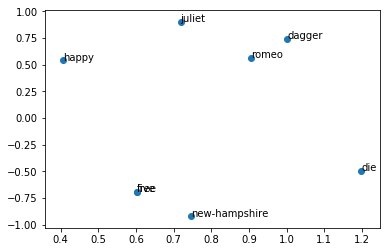

In [300]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(w_x, w_y)
for i, txt in enumerate(words):
    ax.annotate(txt, (w_x[i], w_y[i]))

In [275]:
### Doc Vertors

In [276]:
doc_eigen_val, doc_eigen_vec = np.linalg.eig(np.dot(A, A.T))

In [279]:
doc_vec = np.dot(doc_eigen_vec[:, :2], np.diag(sig[:2]))

In [281]:
doc_x = doc_vec[:, 0]
doc_y = doc_vec[:, 1]

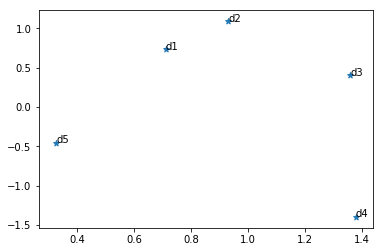

In [303]:
fig, ax = plt.subplots()
ax.scatter(doc_x, doc_y, marker='*')
for i, txt in enumerate(['d1', 'd2', 'd3', 'd4', 'd5']):
    ax.annotate(txt, (doc_x[i], doc_y[i]))

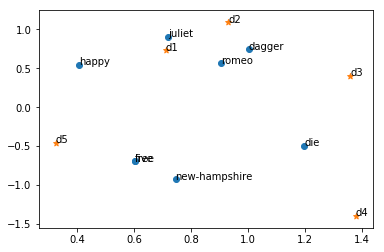

In [304]:
fig, ax = plt.subplots()
ax.scatter(w_x, w_y)
for i, txt in enumerate(words):
    ax.annotate(txt, (w_x[i], w_y[i]))
    
ax.scatter(doc_x, doc_y, marker='*')
for i, txt in enumerate(['d1', 'd2', 'd3', 'd4', 'd5']):
    ax.annotate(txt, (doc_x[i], doc_y[i]))

### Query

In [308]:
# Query : die, dagger
q1 = word_vec[:, 3]
print('dagger', q1)
q2 = word_vec[:, 5]
print('die', q2)

dagger [1.00179178 0.74079687]
die [ 1.19750713 -0.49533699]


In [312]:
query = (q1 + q2) / 2
print('dagger and die :', query)

dagger and die : [1.09964945 0.12272994]


### Query와 document의 거리
$$\text{Cosine Similarity} = \frac{d_i q}{|d_i| |q|}$$

In [314]:
def get_consine_similarity(doc, query):
    dot_prod = np.dot(doc, query)
    len_doc = np.sqrt(sum(doc ** 2))
    len_query = np.sqrt(sum(query ** 2))
    
    return dot_prod / (len_doc * len_query)

In [323]:
result = {}
for idx, doc in zip(docs, doc_vec):
    result[get_consine_similarity(doc, query)] = idx

In [324]:
result

{0.4849183185073821: 'Did you know, New-Hampshire is in New-England',
 0.6187306127613211: "'Live free or die', that's the motto of New-Hampshire",
 0.7306768205359726: 'Juliet: O happy dagger!',
 0.7727964887537556: 'Romeo and Juliet.',
 0.9844359912676067: 'Romeo die by dagger.'}

In [326]:
import operator
sorted(result.items(), key=operator.itemgetter(0), reverse=True)

[(0.9844359912676067, 'Romeo die by dagger.'),
 (0.7727964887537556, 'Romeo and Juliet.'),
 (0.7306768205359726, 'Juliet: O happy dagger!'),
 (0.6187306127613211, "'Live free or die', that's the motto of New-Hampshire"),
 (0.4849183185073821, 'Did you know, New-Hampshire is in New-England')]

Text(1.09965,0.12273,'query')

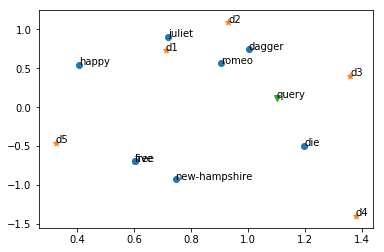

In [357]:
fig, ax = plt.subplots()
ax.scatter(w_x, w_y)
for i, txt in enumerate(words):
    ax.annotate(txt, (w_x[i], w_y[i]))
    
ax.scatter(doc_x, doc_y, marker='*')
for i, txt in enumerate(['d1', 'd2', 'd3', 'd4', 'd5']):
    ax.annotate(txt, (doc_x[i], doc_y[i]))
    
ax.scatter(query[0], query[1], marker='v')
ax.annotate('query', (query[0], query[1]))